# NGO Clustering Assignment

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading and Inspection

In [3]:
# Importing the csv file

df = pd.read_csv("Country-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Inspecting the dataframe

print("Shape of dataset:", df.shape)
print(df.info())
print(df.index)
print(df.columns)
df.describe()

Shape of dataset: (167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
RangeIndex(start=0, stop=167, step=1)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Inspecting the null values

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We could see here there are no null values present in the data.

In [7]:
# Inspecting the null value percentage

round(df.isnull().sum()/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

We could see that there are no null values

# Exploratory Data Analysis (EDA)

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


We could see here the variables exports , health and imports are having percentage. So, converting percentage values to actual values

In [9]:
# Converting percentage values to actual values - exports , health and imports

df['exports'] = round(df['exports'] * df['gdpp'] / 100,2)
df['health']  = round(df['health']  * df['gdpp'] / 100,2)
df['imports'] = round(df['imports'] * df['gdpp'] / 100,2)

In [10]:
df.head() # After Convertions

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


### Outlier Treatment 

In [11]:
# Finding the mean,std,min and max for all the numeric variables.

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


child_mort


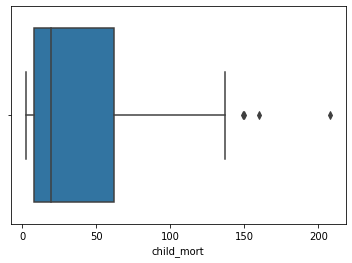

exports


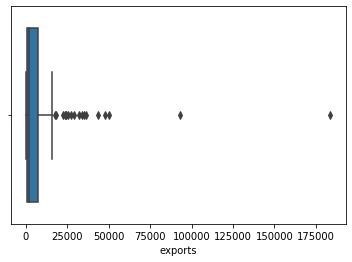

health


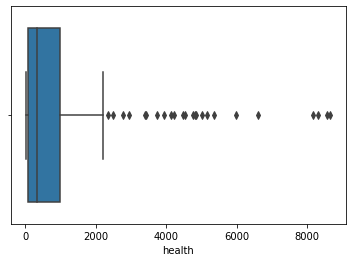

imports


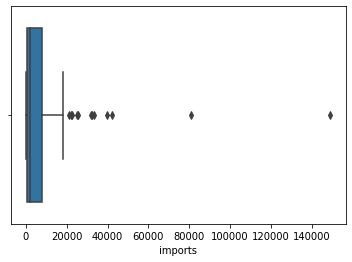

income


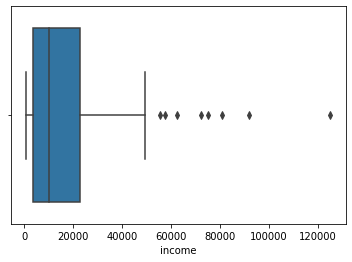

inflation


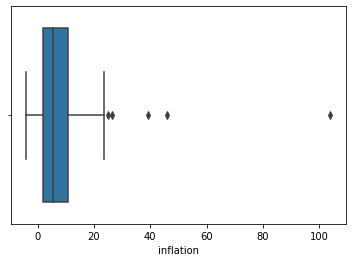

life_expec


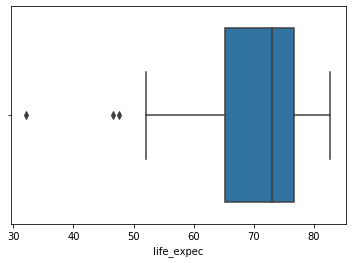

total_fer


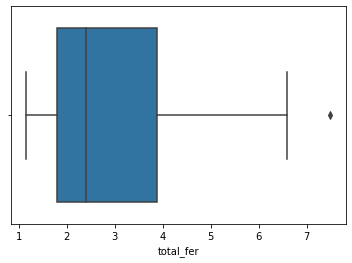

gdpp


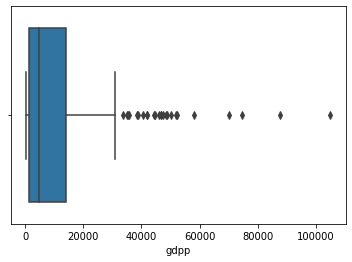

In [12]:
# Let's plot all the numeric variables and check for outliers

for i in ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']:
    print(i)
    sns.boxplot(df[i])
    plt.show()    

From the above box plots for all numeric variables, we can observe that there are outliers present.

we do have the flexibility of not removing the outliers, so we used capping technique to treat the outliers.

And, we can treat all variables high values except child_mort and low values can treat from child_mort.

In [13]:
# Let's see the quantile for all the numeric variables

for i in ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']:
    print(i)
    print(df[i].quantile([0.05,0.25,0.50,0.75,0.95,1]))
    print("  ")

child_mort
0.05      3.46
0.25      8.25
0.50     19.30
0.75     62.10
0.95    116.00
1.00    208.00
Name: child_mort, dtype: float64
  
exports
0.05        70.47
0.25       447.14
0.50      1777.44
0.75      7278.00
0.95     31385.10
1.00    183750.00
Name: exports, dtype: float64
  
health
0.05      26.716
0.25      78.535
0.50     321.890
0.75     976.940
0.95    4966.701
1.00    8663.600
Name: health, dtype: float64
  
imports
0.05       169.281
0.25       640.215
0.50      2045.580
0.75      7719.600
0.95     24241.560
1.00    149100.000
Name: imports, dtype: float64
  
income
0.05      1213.0
0.25      3355.0
0.50      9960.0
0.75     22800.0
0.95     48290.0
1.00    125000.0
Name: income, dtype: float64
  
inflation
0.05      0.1834
0.25      1.8100
0.50      5.3900
0.75     10.7500
0.95     20.8700
1.00    104.0000
Name: inflation, dtype: float64
  
life_expec
0.05    55.78
0.25    65.30
0.50    73.10
0.75    76.80
0.95    81.40
1.00    82.80
Name: life_expec, dtype: float64
  

From above we can clearly see that, there are no low values for child_mort and high values should not treat as per business. So, leaving the child_mort variable.

life_expec and total_fer does not have much high values and those high values look like some decent values. So, we are not trating this variables.

In [14]:
# Checking the types for all the variable

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

##### exports

In [15]:
df['exports'].head()

0      55.30
1    1145.20
2    1712.64
3    2199.19
4    5551.00
Name: exports, dtype: float64

In [16]:
# exports 

q4 = round(df['exports'].quantile(0.99),2)
print(q4)

df['exports'][df['exports']>= q4] = q4

64794.26


In [17]:
# lets check after the capping

df['exports'].quantile([0.25,0.50,0.75,0.99,1])

0.25      447.1400
0.50     1777.4400
0.75     7278.0000
0.99    55136.3084
1.00    64794.2600
Name: exports, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

##### health

In [18]:
df['health'].head()

0     41.92
1    267.90
2    185.98
3    100.60
4    735.66
Name: health, dtype: float64

In [19]:
# health

q4 = round(df['health'].quantile(0.99),2)
print(q4)

df['health'][df['health']>= q4] = q4

8410.33


In [20]:
df['health'].quantile([0.25,0.50,0.75,0.99,1])

0.25      78.5350
0.50     321.8900
0.75     976.9400
0.99    8352.9826
1.00    8410.3300
Name: health, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

##### imports

In [21]:
df['imports'].head()

0     248.30
1    1987.74
2    1400.44
3    1514.37
4    7185.80
Name: imports, dtype: float64

In [22]:
# imports

q4 = round(df['imports'].quantile(0.99),2)
print(q4)

df['imports'][df['imports']>= q4] = q4

55371.39


In [23]:
df['imports'].quantile([0.25,0.50,0.75,0.99,1])

0.25      640.2150
0.50     2045.5800
0.75     7719.6000
0.99    46629.1026
1.00    55371.3900
Name: imports, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

##### inflation

In [24]:
df['inflation'].head()

0     9.44
1     4.49
2    16.10
3    22.40
4     1.44
Name: inflation, dtype: float64

In [25]:
# inflation

q4 = round(df['inflation'].quantile(0.99),2)
print(q4)

df['inflation'][df['inflation']>= q4] = q4

41.48


In [26]:
# lets check after the capping

df['inflation'].quantile([0.25,0.50,0.75,0.99,1])

0.25     1.8100
0.50     5.3900
0.75    10.7500
0.99    39.9752
1.00    41.4800
Name: inflation, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

##### Income

In [27]:
df['income'].head()

0     1610
1     9930
2    12900
3     5900
4    19100
Name: income, dtype: int64

In [28]:
# income 

q4 = int(df['income'].quantile(0.99))
print(q4)

df['income'][df['income']>= q4] = q4

84374


In [29]:
# lets check after the capping

df['income'].quantile([0.25,0.50,0.75,0.99,1])

0.25     3355.00
0.50     9960.00
0.75    22800.00
0.99    81883.16
1.00    84374.00
Name: income, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

##### Gdpp

In [30]:
df['gdpp'].head()

0      553
1     4090
2     4460
3     3530
4    12200
Name: gdpp, dtype: int64

In [31]:
# gdpp 

q4 = int(df['gdpp'].quantile(0.99))
print(q4)

df['gdpp'][df['gdpp']>= q4] = q4

79088


In [32]:
# lets check after the capping

df['gdpp'].quantile([0.25,0.50,0.75,0.99,1])

0.25     1330.00
0.50     4660.00
0.75    14050.00
0.99    76125.92
1.00    79088.00
Name: gdpp, dtype: float64

We could observer here, the 1 quantile became the q4 which is equal to 0.99 quantile.

In [33]:
# Identiy the data types and compare with previous data types after the data types should not change.

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [34]:
# now observe the describe of the dataset.

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214790,1054.206587,5873.135210,16857.550898,7.380994,70.555689,2.947964,12756.826347
std,40.328931,11415.308582,1790.845338,9422.700877,17957.012855,7.793330,8.893172,1.513848,17430.208938
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330000,55371.390000,84374.000000,41.480000,82.800000,7.490000,79088.000000


### Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

Let's see each variable seperately using distplots

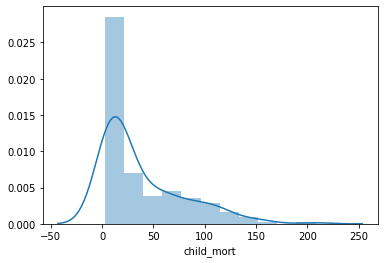

In [35]:
sns.distplot(df['child_mort'])
plt.show()

We observed that the frequency of Death children under 5 years of age per 1000 live births is high at 0 to 50.

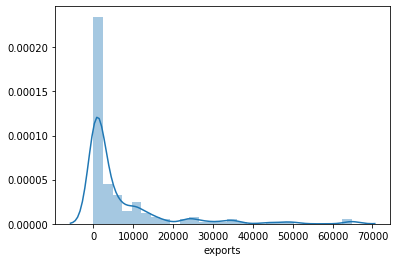

In [36]:
sns.distplot(df['exports'])
plt.show()

We observed that the frequency of 	Exports of goods and services per capita. Given as %age of the GDP per capita is high at 0 to 10000.

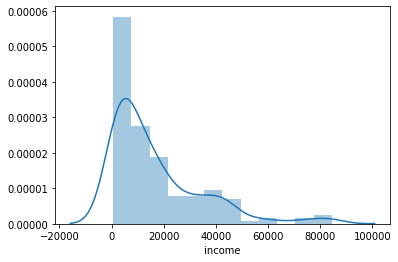

In [37]:
sns.distplot(df['income'])
plt.show()

We observed that the frequency of income is high at 0 to 20000.

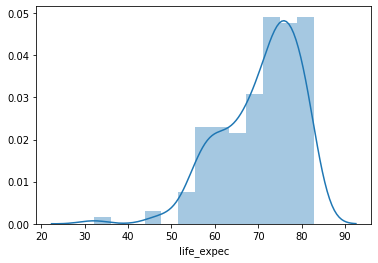

In [38]:
sns.distplot(df['life_expec'])
plt.show()

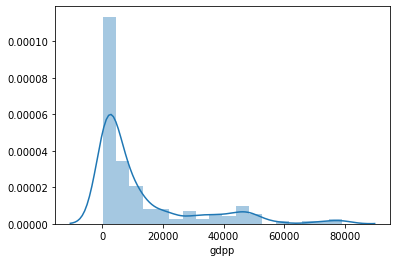

In [39]:
sns.distplot(df['gdpp'])
plt.show()

### Bivariate Analysis

Let's check the emphirical relationship between variables using scatterplot 

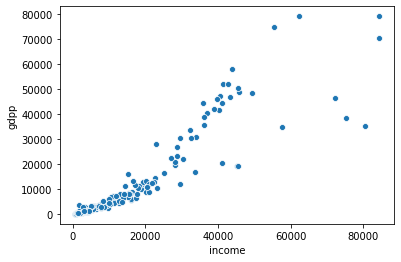

In [40]:
sns.scatterplot('income','gdpp',data=df)
plt.show()

We could observe that there a good relation between income and gdpp.

Likewise using pair plot we can see all the numeric variables relation in one place.

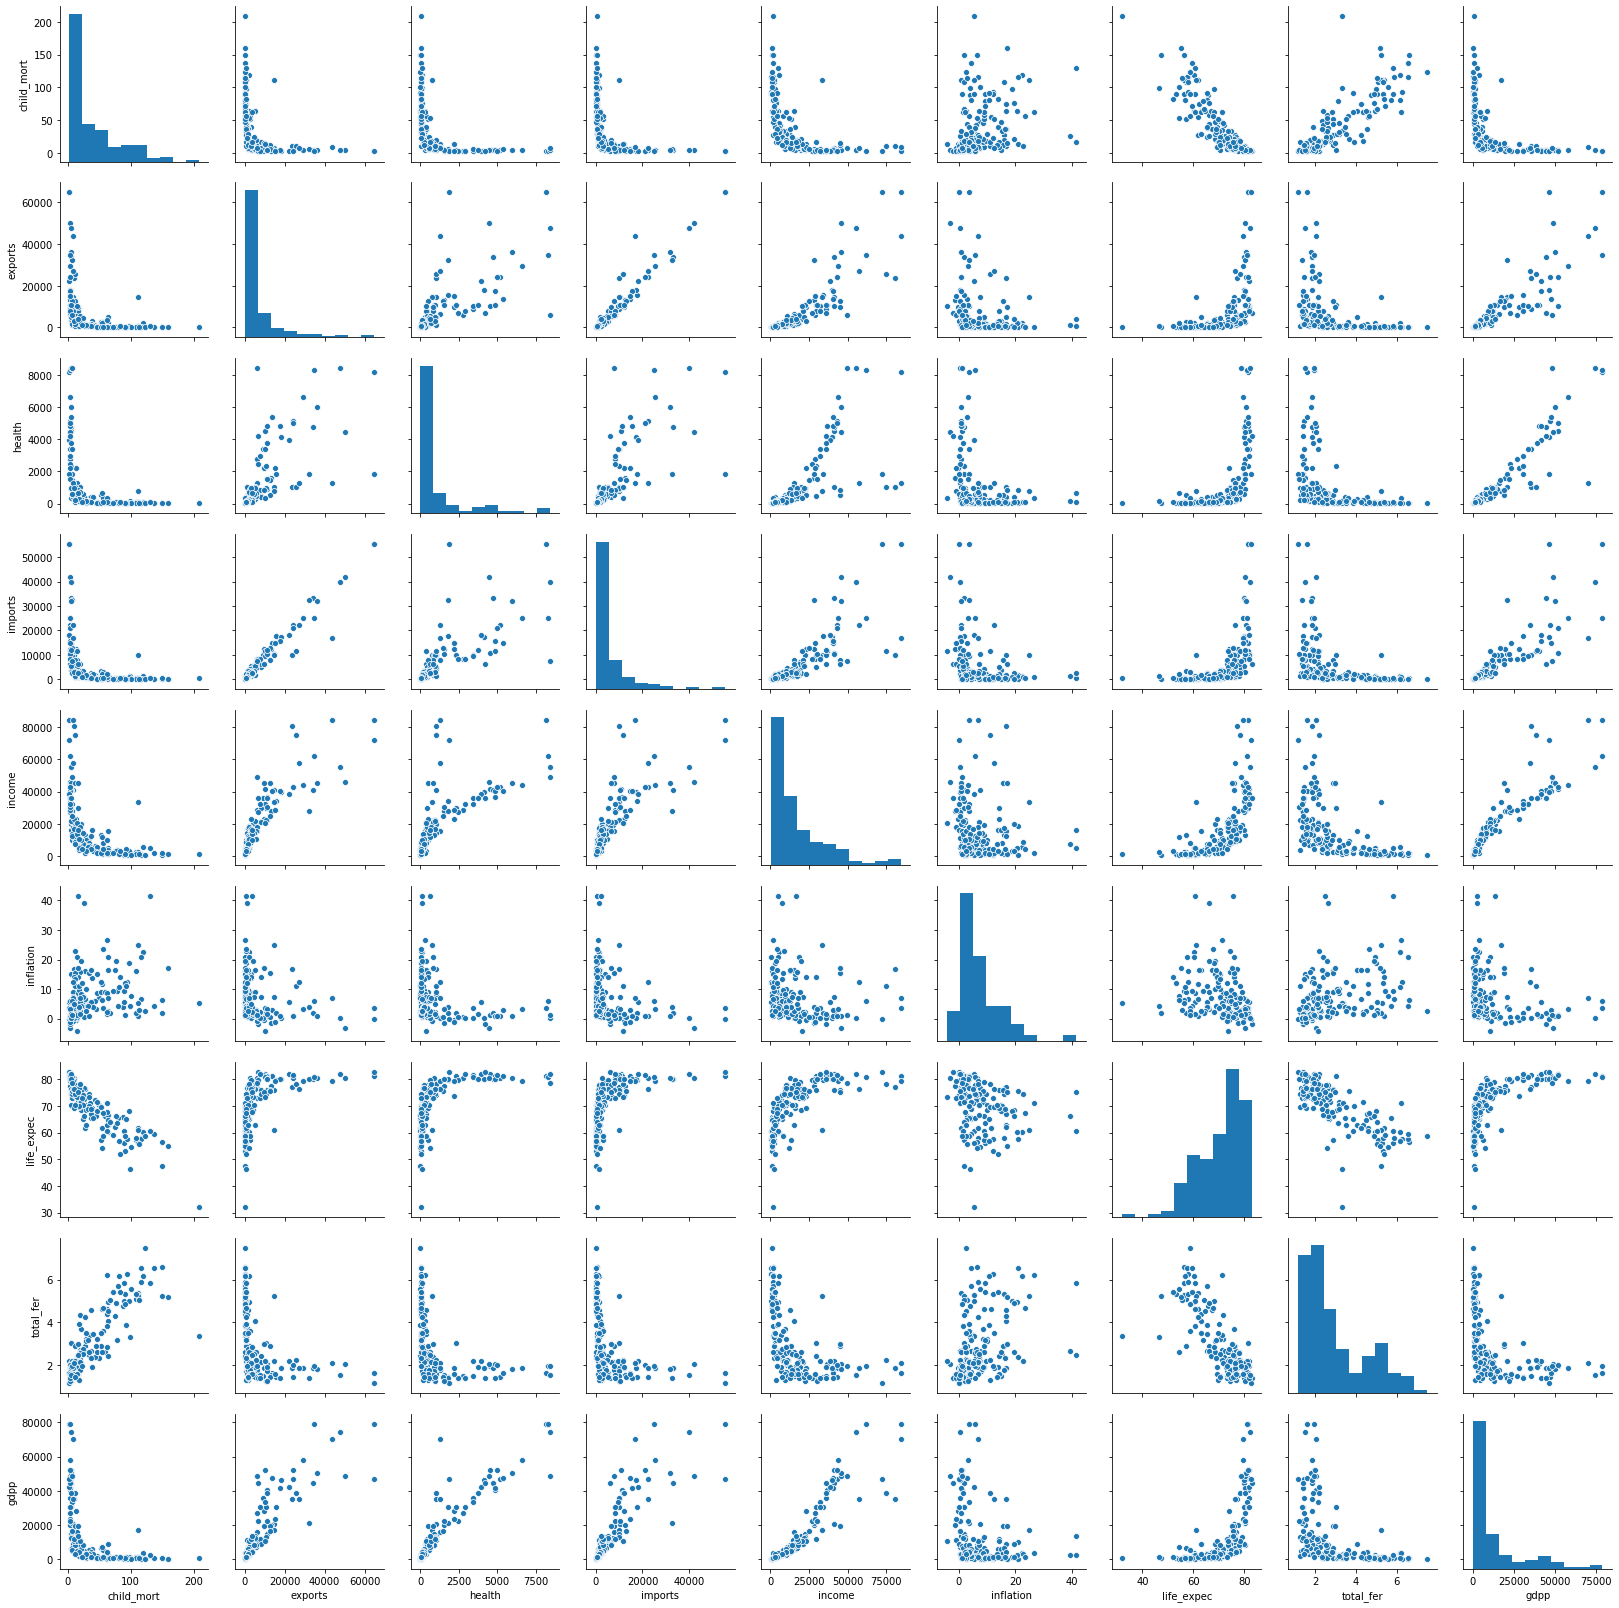

In [41]:
sns.pairplot(df)
plt.show()

# Clustering

In [42]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
for i in range(10):
    print("Hopikins value is:" , hopkins(df.drop('country', axis=1)))

Hopikins value is: 0.8640736887948187
Hopikins value is: 0.9341037059005118
Hopikins value is: 0.8610969772942979
Hopikins value is: 0.9062450227251667
Hopikins value is: 0.8582051591152114
Hopikins value is: 0.934559246457788
Hopikins value is: 0.8936984541376936
Hopikins value is: 0.9026408843818462
Hopikins value is: 0.9123987284169162
Hopikins value is: 0.9536309873614152


We could observe that the average low Hopkins value for 10 iterations is 88%.

88% is best indication for cluster tendency.

Our data has cluster tendency, So we can go for clustering techniques

### Scaling

We used Standardization scaling here and scaling is for only for numeric variables.

In [44]:
df_final = df.copy()

In [45]:
df_final.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [46]:
# Standardscaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final.drop('country', axis=1))
df_scaled

array([[ 1.29153238, -0.56962212, -0.56695631, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.44039058, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399974, -0.48627192, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54025194, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242797, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227381, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [47]:
# Assign the scaled values to a new dataframe.

df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.569622,-0.566956,-0.598740,-0.851668,0.264996,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440391,-0.413584,-0.386946,-0.372073,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486272,-0.476100,-0.221053,1.122143,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534091,-0.463973,-0.612045,1.932958,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764610,0.704258,-0.541946,-0.032042


In [48]:
# Changing the variable names

df_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

In [49]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566956,-0.598740,-0.851668,0.264996,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440391,-0.413584,-0.386946,-0.372073,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486272,-0.476100,-0.221053,1.122143,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534091,-0.463973,-0.612045,1.932958,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764610,0.704258,-0.541946,-0.032042


In [50]:
# lets see how the variables are scaled

pd.options.display.float_format='{:.4f}'.format
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030
min,-0.8871,-0.5744,-0.5833,-0.6251,-0.9076,-1.4918,-4.3372,-1.1913,-0.7208
25%,-0.7466,-0.5352,-0.5464,-0.5570,-0.7542,-0.7170,-0.5928,-0.7639,-0.6575
50%,-0.4718,-0.4183,-0.4102,-0.4074,-0.3853,-0.2562,0.2870,-0.3564,-0.4659
75%,0.5927,0.0650,-0.0433,0.1965,0.3319,0.4336,0.7043,0.6175,0.0744
max,4.2213,5.1187,4.1200,5.2689,3.7712,4.3886,1.3810,3.0093,3.8170


## Clustering

There are 2 clustering techniques:

    K-means Clustering:

    K-means clustering is one of the simplest and popular unsupervised machine learning algorithms, to achieve the optimal K value.

    Hierarchical Clustering:

    Hierarchical cluster analysis is an algorithm that groups similar objects into groups called clusters.


#### K-means Clustering:

To identify the optimal number of clusters, we have 2 methods.

    	Elbow Curve/Sum of Squared Distance(SSD)
    	Silhouette Analysis.

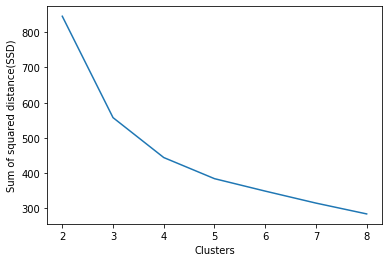

In [51]:
# elbow-curve/Sum of squared distance(SSD)
ssd = []
range_n = [2, 3, 4, 5, 6, 7, 8]
for i in range_n:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n,ssd)
plt.ylabel('Sum of squared distance(SSD)')
plt.xlabel('Clusters')
plt.show()

The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters. 

So, by observing the above elbow curve there is a declines at 3 and 4. 

In [52]:
# silhouette analysis
range_n = [2, 3, 4, 5, 6, 7, 8]
ss = []

for i in range_n:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    ss.append([i, silhouette_score(df_scaled, cluster_labels)])
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4694757337409977
For n_clusters=3, the silhouette score is 0.4027817194248596
For n_clusters=4, the silhouette score is 0.3912423527234359
For n_clusters=5, the silhouette score is 0.38351381542333335
For n_clusters=6, the silhouette score is 0.27782723725955916
For n_clusters=7, the silhouette score is 0.31145014389864845
For n_clusters=8, the silhouette score is 0.3184326189286804


We could observe the silhouette scores that the average is good at 2 and 3.

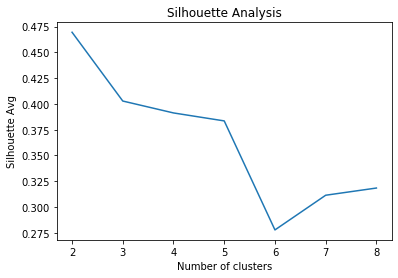

In [53]:
# plot the silhouette score as a curve

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Avg')
plt.title('Silhouette Analysis')
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

Finally to make the cluster strong we go with k=3 clusters.

In [54]:
# K=3
# Final Kmeans Clustering

kmean = KMeans(n_clusters = 3, max_iter=50, random_state = 50)
kmean.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [55]:
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [56]:
# Adding the cluster labels to our main data

df_final['cluster_lables'] = kmean.labels_

In [57]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2000,55.3000,41.9200,248.3000,1610,9.4400,56.2000,5.8200,553,1
1,Albania,16.6000,1145.2000,267.9000,1987.7400,9930,4.4900,76.3000,1.6500,4090,2
2,Algeria,27.3000,1712.6400,185.9800,1400.4400,12900,16.1000,76.5000,2.8900,4460,2
3,Angola,119.0000,2199.1900,100.6000,1514.3700,5900,22.4000,60.1000,6.1600,3530,1
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,2


In [58]:
# Identify the counts of each cluster count

df_final['cluster_lables'].value_counts()

2    90
1    48
0    29
Name: cluster_lables, dtype: int64

lets plot the cluster lables with child_mort, income and gdpp and observer which cluster is our final cluster to find out the help required contries list.

And, we are looking for low income, low gdpp and high child_mort as our primary focus.

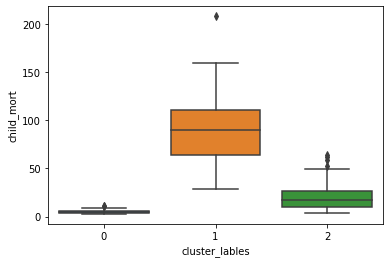

In [59]:
# Plot the cluster lables with child_mort.

sns.boxplot('cluster_lables','child_mort',data=df_final)
plt.show()

We could observe that cluster-1 has high child_mort.

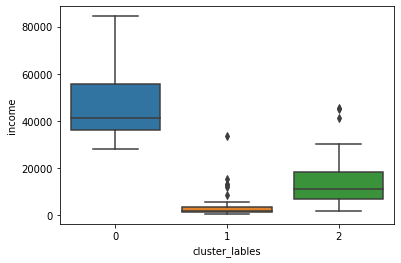

In [60]:
# Plot the cluster lables with income.

sns.boxplot('cluster_lables','income',data=df_final)
plt.show()

We could observe that cluster-1 has low income rated countries list.

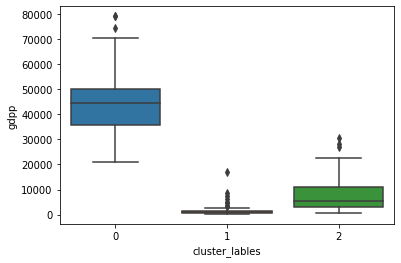

In [61]:
# Plot the cluster lables with gdpp.

sns.boxplot('cluster_lables','gdpp',data=df_final)
plt.show()

We could observe that cluster-1 has low gddp countries list.

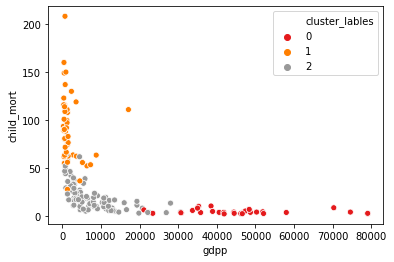

In [62]:
# Plot the cluster

sns.scatterplot('gdpp','child_mort', hue='cluster_lables',data=df_final,palette = 'Set1')

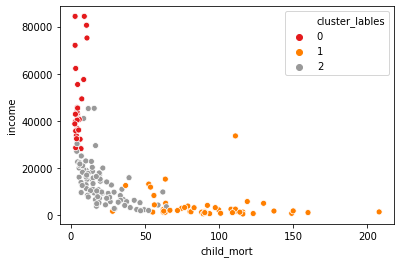

In [63]:
# Plot the cluster

sns.scatterplot( 'child_mort','income', hue = 'cluster_lables', data = df_final, palette = 'Set1')

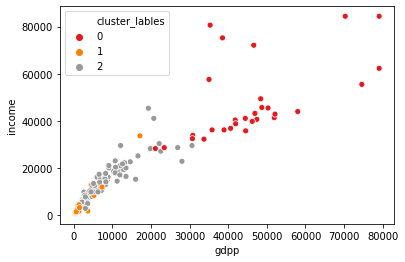

In [64]:
# Plot the cluster

sns.scatterplot( 'gdpp','income', hue = 'cluster_lables', data = df_final, palette = 'Set1')

## Cluster Profiling

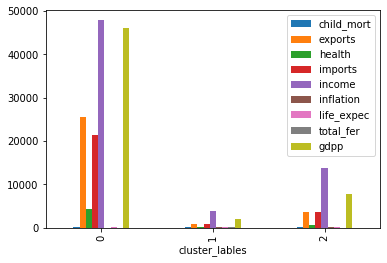

In [65]:
# Making sense out of the clsuters

df_final.drop('country',axis=1).groupby('cluster_lables').mean().plot(kind = 'bar')
plt.show()

In [66]:
# Identify for low income, low gdpp and high child_mort as our primary focus.

cluster_pro = df_final[['child_mort','income','gdpp','cluster_lables']]
cluster_pro.head()

,child_mort,income,gdpp,cluster_lables
0,90.2000,1610,553,1
1,16.6000,9930,4090,2
2,27.3000,12900,4460,2
3,119.0000,5900,3530,1
4,10.3000,19100,12200,2


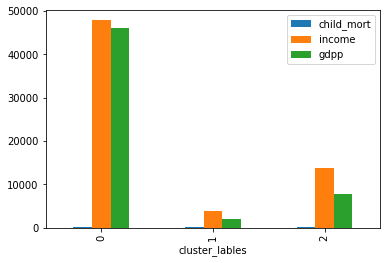

In [67]:
# Making sense out of the clusters

cluster_pro.groupby('cluster_lables').mean().plot(kind = 'bar')

From the above plot, We could observe that cluster-1 has high child_mort, low income and low gddp listed countries.

In [68]:
# We have Low income, Low GDP and High Child_mort in Cluster 1

best_cluster = df_final[df_final['cluster_lables'] == 1]

In [69]:
best_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2000,55.3000,41.9200,248.3000,1610,9.4400,56.2000,5.8200,553,1
3,Angola,119.0000,2199.1900,100.6000,1514.3700,5900,22.4000,60.1000,6.1600,3530,1
17,Benin,111.0000,180.4000,31.0800,281.9800,1820,0.8850,61.8000,5.3600,758,1
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300,8.9200,57.1000,2.8800,6350,1
25,Burkina Faso,116.0000,110.4000,38.7600,170.2000,1430,6.8100,57.9000,5.8700,575,1


In [70]:
# Sort the final selected cluster details as high child_mort, low income and low gdpp

best_cluster.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
66,Haiti,208.0000,101.2900,45.7400,428.3100,1500,5.4500,32.1000,3.3300,662,1
132,Sierra Leone,160.0000,67.0300,52.2700,137.6600,1220,17.2000,55.0000,5.2000,399,1
32,Chad,150.0000,330.1000,40.6300,390.2000,1930,6.3900,56.5000,6.5900,897,1
31,Central African Republic,149.0000,52.6300,17.7500,118.1900,888,2.0100,47.5000,5.2100,446,1
97,Mali,137.0000,161.4200,35.2600,248.5100,1870,4.3700,59.5000,6.5500,708,1


## Hierarchical Clustering

    o	Hierarchical cluster analysis is an algorithm that groups similar objects into groups called clusters.

In [71]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables
0,Afghanistan,90.2000,55.3000,41.9200,248.3000,1610,9.4400,56.2000,5.8200,553,1
1,Albania,16.6000,1145.2000,267.9000,1987.7400,9930,4.4900,76.3000,1.6500,4090,2
2,Algeria,27.3000,1712.6400,185.9800,1400.4400,12900,16.1000,76.5000,2.8900,4460,2
3,Angola,119.0000,2199.1900,100.6000,1514.3700,5900,22.4000,60.1000,6.1600,3530,1
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,2


In [72]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.5696,-0.5670,-0.5987,-0.8517,0.2650,-1.6191,1.9029,-0.7023
1,-0.5389,-0.4739,-0.4404,-0.4136,-0.3869,-0.3721,0.6479,-0.8600,-0.4987
2,-0.2728,-0.4240,-0.4863,-0.4761,-0.2211,1.1221,0.6704,-0.0384,-0.4774
3,2.0078,-0.3812,-0.5341,-0.4640,-0.6120,1.9330,-1.1792,2.1282,-0.5310
4,-0.6956,-0.0867,-0.1784,0.1397,0.1253,-0.7646,0.7043,-0.5419,-0.0320


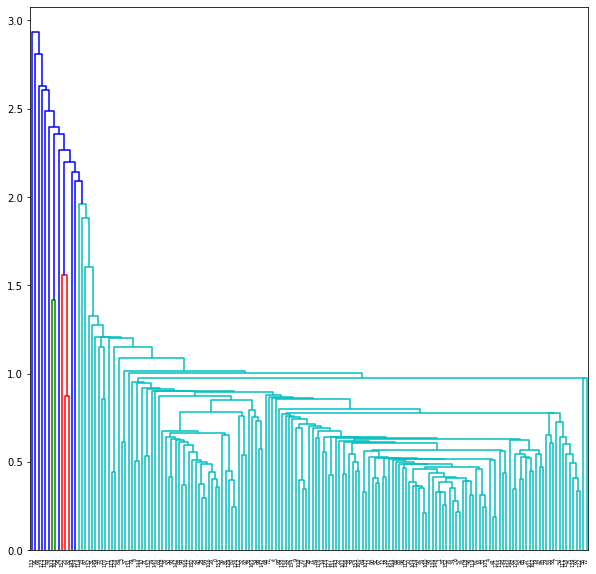

In [73]:
# Single linkage

plt.figure(figsize=(10,10))
mergings = linkage(df_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

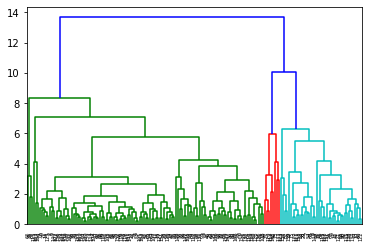

In [74]:
# Complete linkage

mergings = linkage(df_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

From the both single and complete linkage 

    Single linkage calculates the shortest distance between points in the clusters, whereas complete Linkage calcumates the maximum distance between any two points in the clusters.

Here from above 2 dendrogram, there is more clear details in complete linkage, so we go for complete linkage.

In [75]:
# cut_tree the clusters as 3

cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [76]:
# Adding the cluster labels to our main data

df_final['Hie_cluster_lables'] = cluster_labels

In [77]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hie_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9200,248.3000,1610,9.4400,56.2000,5.8200,553,1,0
1,Albania,16.6000,1145.2000,267.9000,1987.7400,9930,4.4900,76.3000,1.6500,4090,2,0
2,Algeria,27.3000,1712.6400,185.9800,1400.4400,12900,16.1000,76.5000,2.8900,4460,2,0
3,Angola,119.0000,2199.1900,100.6000,1514.3700,5900,22.4000,60.1000,6.1600,3530,1,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,2,1


In [78]:
# Identify the counts of each cluster count

df_final['Hie_cluster_lables'].value_counts()

0    118
1     41
2      8
Name: Hie_cluster_lables, dtype: int64

lets plot the cluster lables with child_mort, income and gdpp and observer which cluster is our final cluster to find out the help required contries list.

And, we are looking for low income, low gdpp and high child_mort as our primary focus.

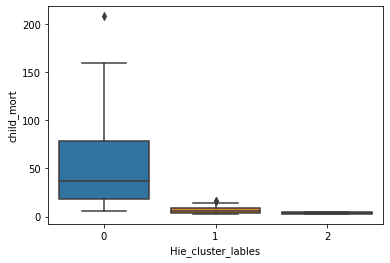

In [79]:
sns.boxplot('Hie_cluster_lables','child_mort',data=df_final)

We could observe here that the 0th cluster has high child_mort and 2nd cluster has low child_mort.

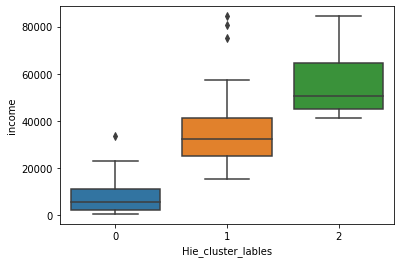

In [80]:
sns.boxplot('Hie_cluster_lables','income',data=df_final)

We could observe here that the 0th cluster has low income and 2nd cluster has high child_mort.

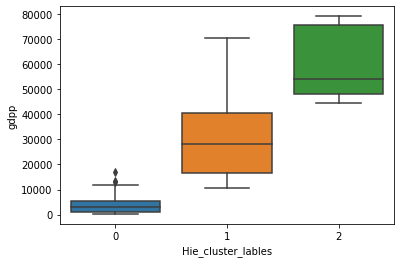

In [81]:
sns.boxplot('Hie_cluster_lables','gdpp',data=df_final)

We could observe here that the 0th cluster has high child_mort

In [82]:
# Identify for low income, low gdpp and high child_mort as our primary focus.

cluster_pro = df_final[['child_mort','income','gdpp','Hie_cluster_lables']]
cluster_pro.head()

,child_mort,income,gdpp,Hie_cluster_lables
0,90.2000,1610,553,0
1,16.6000,9930,4090,0
2,27.3000,12900,4460,0
3,119.0000,5900,3530,0
4,10.3000,19100,12200,1


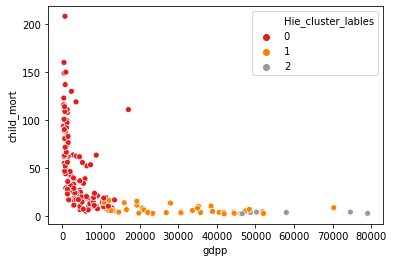

In [83]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'Hie_cluster_lables', data = df_final, palette = 'Set1')

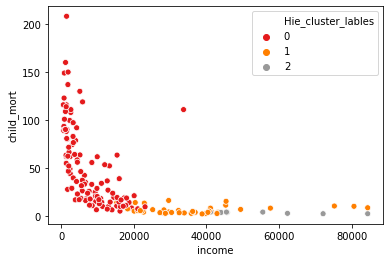

In [84]:
# Plot the cluster
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Hie_cluster_lables', data = df_final, palette = 'Set1')

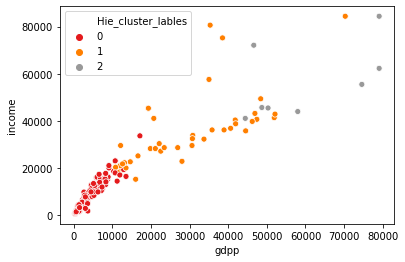

In [85]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Hie_cluster_lables', data = df_final, palette = 'Set1')

## Cluster Profiling

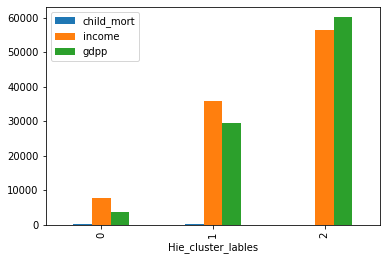

In [86]:
# Making sense out of the clsuters

cluster_pro.groupby('Hie_cluster_lables').mean().plot(kind = 'bar')

From the above graph, we observed that the variables cluster-0 has the low gdpp, high child_mort and low income.

In [87]:
# Taking the cluster 0 details as our final cluster

Hie_best_cluster = df_final[df_final['Hie_cluster_lables'] == 0]
Hie_best_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hie_cluster_lables
0,Afghanistan,90.2000,55.3000,41.9200,248.3000,1610,9.4400,56.2000,5.8200,553,1,0
1,Albania,16.6000,1145.2000,267.9000,1987.7400,9930,4.4900,76.3000,1.6500,4090,2,0
2,Algeria,27.3000,1712.6400,185.9800,1400.4400,12900,16.1000,76.5000,2.8900,4460,2,0
3,Angola,119.0000,2199.1900,100.6000,1514.3700,5900,22.4000,60.1000,6.1600,3530,1,0
5,Argentina,14.5000,1946.7000,834.3000,1648.0000,18700,20.9000,75.8000,2.3700,10300,2,0


In [88]:
# Sort the final selected cluster details as high child_mort, low income and low gdpp

Hie_best_cluster.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lables,Hie_cluster_lables
66,Haiti,208.0000,101.2900,45.7400,428.3100,1500,5.4500,32.1000,3.3300,662,1,0
132,Sierra Leone,160.0000,67.0300,52.2700,137.6600,1220,17.2000,55.0000,5.2000,399,1,0
32,Chad,150.0000,330.1000,40.6300,390.2000,1930,6.3900,56.5000,6.5900,897,1,0
31,Central African Republic,149.0000,52.6300,17.7500,118.1900,888,2.0100,47.5000,5.2100,446,1,0
97,Mali,137.0000,161.4200,35.2600,248.5100,1870,4.3700,59.5000,6.5500,708,1,0


Both clustering techniques gives the same list of countries. However, Hierarchical clustering is time consuming and needs a lot of processing power because of we compute the distance of each point from each other point. Whereas in Kmeans we have to predefined the K value. Based on the time factor kmeans clustering method is best for this analysis.


### Recommendations and Conclusion:

##### The top 5 countries that required help the most are listed below.
    Haiti
    Sierra Leone
    Chad
    Central African Republic
    Mali

##### The above listed countries are having 
    Low gdpp
        The GDP per capita. Calculated as the Total GDP divided by the total population.
    Low income
        Net income per person.
    High child_mort
        Death of children under 5 years of age per 1000 live births.

##### So, it is highly recommended that the above listed 5 countries required quick aid.